# Amazon Web Services - Use Case 1

## 1. Reading the dataset

I read the dataset into a dataframe using Pandas

In [157]:
import numpy as np                                
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image                 
from IPython.display import display               
from sklearn.datasets import dump_svmlight_file   
from time import gmtime, strftime                 
import sys                                        
import math                                       
import json
%matplotlib inline

In [158]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
  
df = pd.read_excel('default of credit card clients.xls', header = 1)

print('The shape of the training dataset is:', df.shape)

The shape of the training dataset is: (30000, 25)


## 2. Exploratory Data Analysis

In [159]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [160]:
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (30000, 25)


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [162]:
df.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Target distribution

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt

df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

We can see that almost 22% did their payments in time which is a good percentage and indicates that the data is not imbalanced.

In [164]:
# Number of unique elements in dataset
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         5
MARRIAGE                          3
AGE                              63
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [165]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Now we'll look at the correlation between different features to make sure no features are highly correlated which could affect our model.<br>
This will be done using a correlation matrix.

Text(0.5, 1.0, 'dataset correlation')

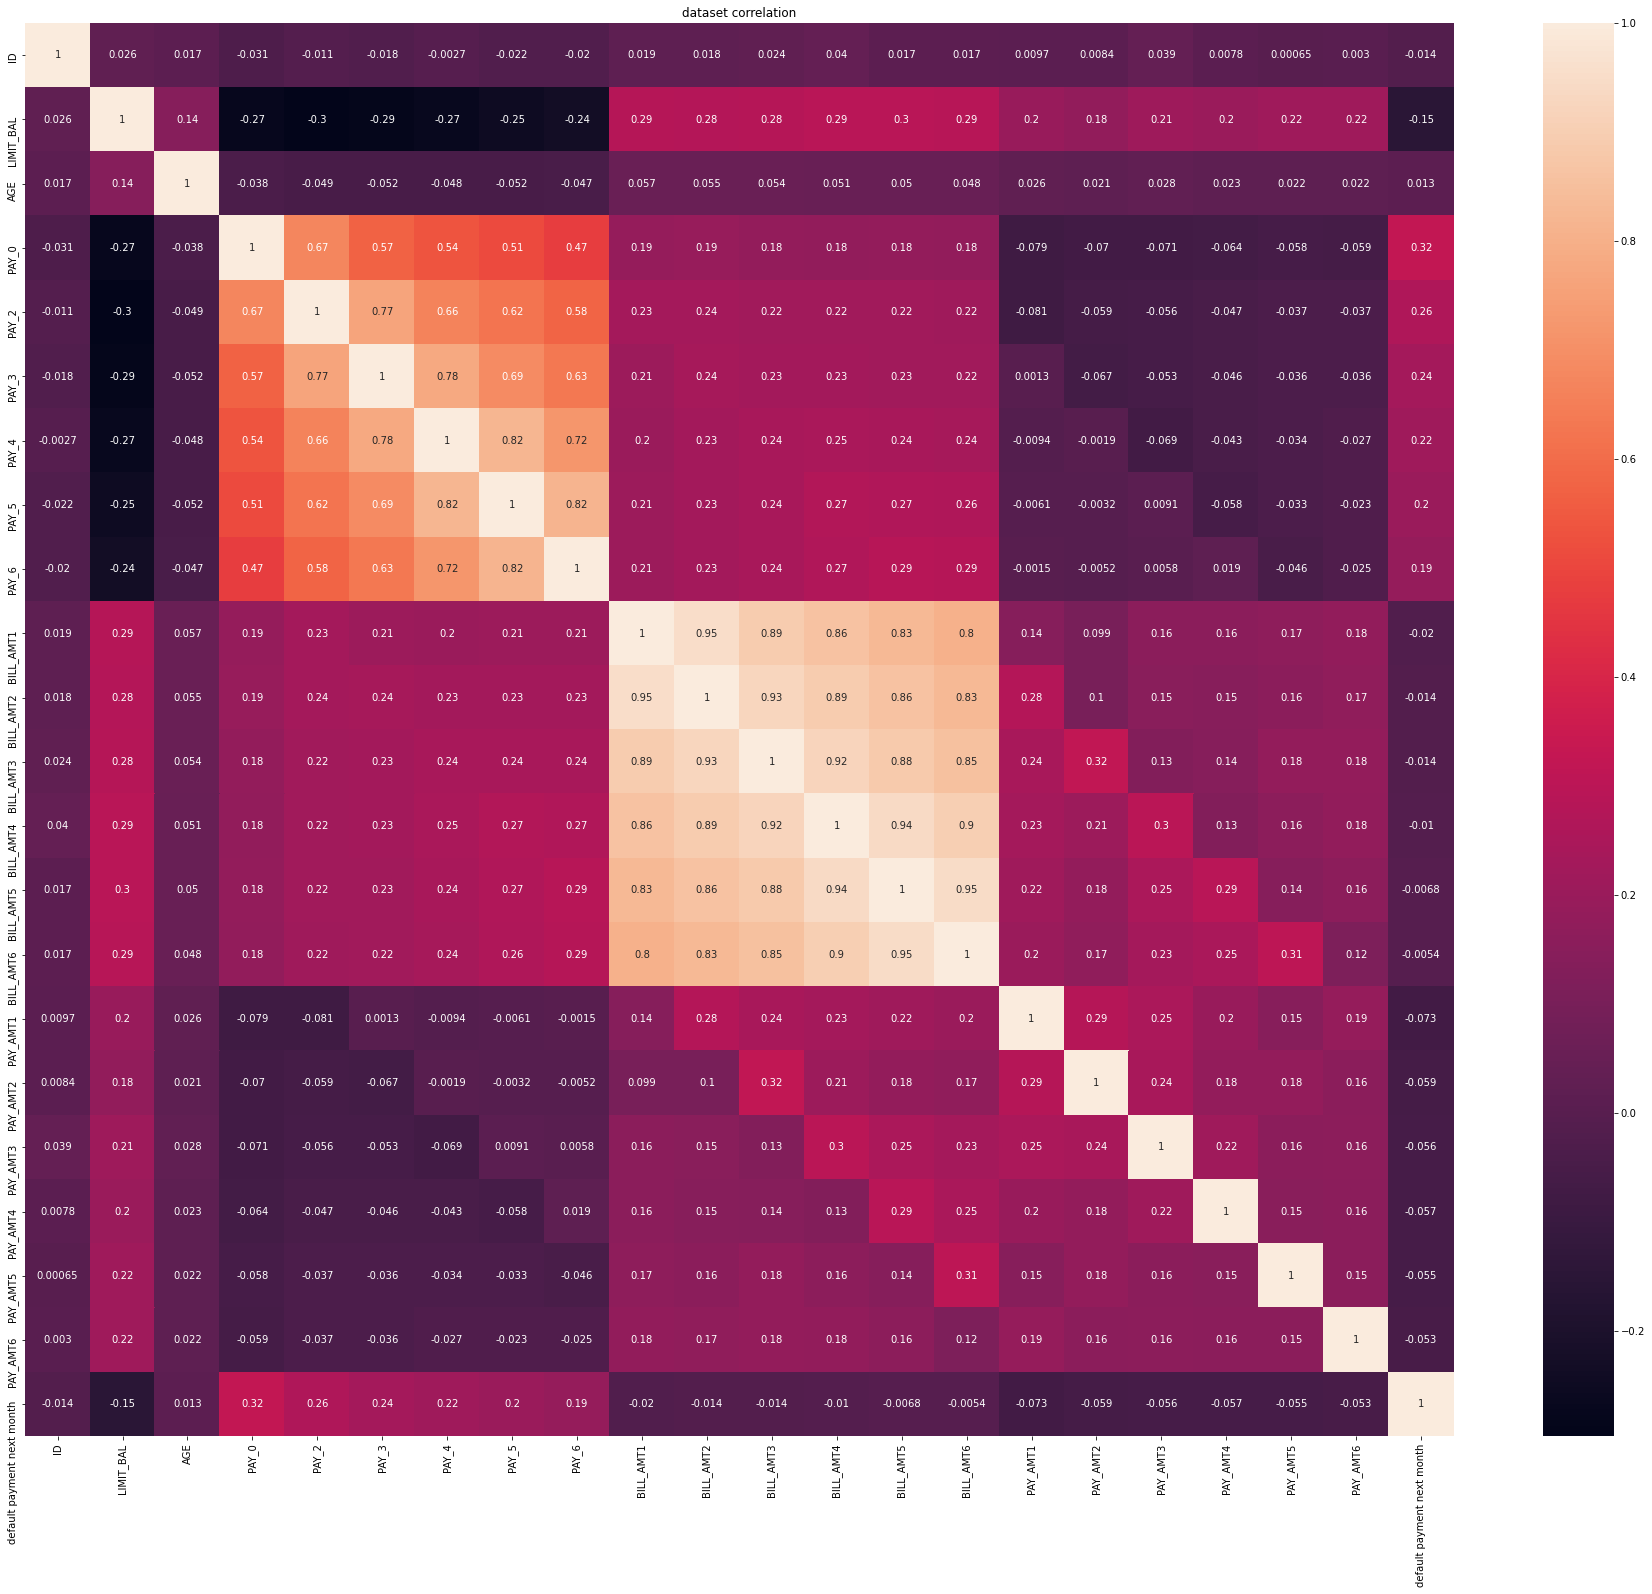

In [166]:
plt.figure(figsize = (32,26))
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.title('dataset correlation')

It appears that there is a correlation between the repayment status in each month and the one before it which is very logical. But, the highest correlation is 95% which is okay to leave those features.<br>
So, We won't be removing any features from our dataset.

In [167]:
numeric_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                    'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

text_categorical_features =  ['SEX', 'EDUCATION', 'MARRIAGE',]

numeric_categorical_features =  ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

non_useful_features = ['ID']

label_feature = ['default payment next month']

In [168]:
df[numeric_features].head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [169]:
df[text_categorical_features].nunique()

SEX          2
EDUCATION    5
MARRIAGE     3
dtype: int64

In [170]:
df[numeric_categorical_features].nunique()

PAY_0    11
PAY_2    11
PAY_3    11
PAY_4    11
PAY_5    10
PAY_6    10
dtype: int64

In [171]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [172]:
df.shape

(30000, 25)

There was no duplicates so no rows were removed

## 3. Select features to build the model

In [173]:
all_features = numeric_features + text_categorical_features + numeric_categorical_features + label_feature #+ date_features

In [174]:
label = 'default payment next month'

In [175]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [176]:
df[all_features].head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
0,20000,24,3913,3102,689,0,0,0,0,689,...,female,university,married,2,2,-1,-1,-2,-2,1
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,female,university,single,-1,2,0,0,0,2,1
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,female,university,single,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,female,university,married,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,male,university,married,-1,0,-1,0,0,0,0


In [177]:
print('Numerical categorial columns:', df[numeric_categorical_features].select_dtypes(include=np.number).columns)
print('Numerical            columns:', df[numeric_features].select_dtypes(include=np.number).columns)
print('Text   Categorical columns:',df[text_categorical_features].select_dtypes(include='object').columns)

Numerical categorial columns: Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], dtype='object')
Numerical            columns: Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')
Text   Categorical columns: Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')


Next we'll be checking for numerical features outliers

In [178]:
for c in numeric_features:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))

LIMIT_BAL
(9009.999, 109000.0]     12498
(109000.0, 208000.0]      7880
(208000.0, 307000.0]      5059
(307000.0, 406000.0]      2759
(406000.0, 505000.0]      1598
(505000.0, 604000.0]       127
(604000.0, 703000.0]        56
(703000.0, 802000.0]        22
(802000.0, 901000.0]         0
(901000.0, 1000000.0]        1
Name: LIMIT_BAL, dtype: int64
AGE
(20.753, 45.6]    25327
(45.6, 70.2]       4651
(70.2, 94.8]         15
(94.8, 119.4]         0
(119.4, 144.0]        2
(144.0, 168.6]        2
(168.6, 193.2]        0
(193.2, 217.8]        0
(217.8, 242.4]        2
(242.4, 267.0]        1
Name: AGE, dtype: int64
BILL_AMT1
(-166710.09199999998, -52570.9]        2
(-52570.9, 60438.2]                21885
(60438.2, 173447.3]                 6007
(173447.3, 286456.4]                1534
(286456.4, 399465.5]                 397
(399465.5, 512474.6]                 143
(512474.6, 625483.7]                  27
(625483.7, 738492.8]                   3
(738492.8, 851501.9]                   1
(85

It appears that there are some outliers in the age column, some ages are above 120 years. So, we need to remove those outliers.

In [179]:
df = df[df.AGE < 120]

In [180]:
df.shape

(29993, 25)

7 rowas are dropped, Those that had age value greater than 120 years.<br>
Let's check missing values for these numerical features.

In [181]:
print(df[numeric_features].isna().sum())

LIMIT_BAL    0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64


#### Cleaning categorical features 

Let's also examine the categorical features.

In [182]:
for c in text_categorical_features:
    print(c)
    print(df[c].unique())

SEX
['female' 'male']
EDUCATION
['university' 'graduate school' 'others' 'high school' nan 0]
MARRIAGE
['married' 'single' nan 0]


In [183]:
for c in text_categorical_features:
    print(c)
    print(df[c].value_counts())

SEX
female    18108
male      11885
Name: SEX, dtype: int64
EDUCATION
university         14027
graduate school    10583
high school         4914
others               124
0                     14
Name: EDUCATION, dtype: int64
MARRIAGE
single     15961
married    13655
0             54
Name: MARRIAGE, dtype: int64


We have some columns having nan or 0 values in those features which doesn't make sense. Since the number of those rows is not big and it won't affect our dataset, we can remove them or we can replace them with the mode of each column.<br>
Here I will be replacing them with the mode of each column.

In [184]:
df['EDUCATION'].replace(0, df['EDUCATION'].mode()[0], inplace=True)

In [185]:
df['MARRIAGE'].replace(0, df['MARRIAGE'].mode()[0], inplace=True)

In [186]:
for c in text_categorical_features:
    print(c)
    print(df[c].value_counts())

SEX
female    18108
male      11885
Name: SEX, dtype: int64
EDUCATION
university         14041
graduate school    10583
high school         4914
others               124
Name: EDUCATION, dtype: int64
MARRIAGE
single     16015
married    13655
Name: MARRIAGE, dtype: int64


In [187]:
education = pd.get_dummies(df['EDUCATION'])
sex = pd.get_dummies(df['SEX'])
marriage = pd.get_dummies(df['MARRIAGE'])

In [188]:
df = pd.concat([df[numeric_features + numeric_categorical_features + label_feature],
                   education[['university', 'graduate school', 'high school']],
                   sex['female'], marriage['married']], axis = 1)
df.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'default payment next month', 'university',
       'graduate school', 'high school', 'female', 'married'],
      dtype='object')

In [189]:
df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,university,graduate school,high school,female,married
0,20000,24,3913,3102,689,0,0,0,0,689,...,-1,-1,-2,-2,1,1,0,0,1,1
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,2,1,1,0,0,1,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,1,0,0,1,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,0,1,0,0,1,1
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,-1,0,0,0,0,1,0,0,0,1


In [196]:
numeric_categorical_features =  ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'university', 'graduate school',
                                 'high school', 'female', 'married']

## 4. Training and test datasets

First we will split our data into training (90%) and test (10%) sets

In [190]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=True, random_state=23)


In [191]:
print('Number of training points: ' + str(train_data.shape[0]))
print('Number of validation points: ' + str(val_data.shape[0]))
print('Number of test points: ' + str(test_data.shape[0]))

Number of training points: 23994
Number of validation points: 2999
Number of test points: 3000


## 5. Data processing with Pipeline and ColumnTransformer

Creating the pipeline with one hot encoding for text categorical features

In [232]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline

# Preprocess the numerical features
numerical_processor = Pipeline([('num_scaler', MinMaxScaler())])

data_preprocessor = ColumnTransformer([('numerical_pre', numerical_processor, numeric_features)])

pipeline = Pipeline([('data_preprocessing', data_preprocessor),
                     ('dt', RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0))])

# Visualize the pipeline
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6'])])),
                ('dt',
                 RandomForestClassifier(criterion='entropy', random_state=0))])

## 6. Train the classifier and see confusion matrix

First, well train and test the classifier on the training and test sets.

In [233]:
# Split the label and features
X_train = train_data.drop(['default payment next month'], axis = 1)
y_train = train_data[label]

# Fit the classifier to the training data
pipeline.fit(X_train, y_train)

#Get the predicitons on the training data
train_predictions = pipeline.predict(X_train)

# Get test data to test the pipeline
X_test = test_data.drop(['default payment next month'], axis = 1)
y_test = test_data[label]

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)

In [234]:
cm_train = confusion_matrix(y_train, train_predictions)
cm_train

array([[18599,    28],
       [   49,  5318]], dtype=int64)

In [235]:
cm_test = confusion_matrix(y_test, test_predictions)
cm_test

array([[2251,  118],
       [ 499,  132]], dtype=int64)

In [236]:
print(classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18627
           1       0.99      0.99      0.99      5367

    accuracy                           1.00     23994
   macro avg       1.00      0.99      1.00     23994
weighted avg       1.00      1.00      1.00     23994



In [237]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2369
           1       0.53      0.21      0.30       631

    accuracy                           0.79      3000
   macro avg       0.67      0.58      0.59      3000
weighted avg       0.76      0.79      0.76      3000



We can see from the confusion matrix that the model got an accuracy of 99.7% on the training set but on the test set we got 80% which indicates that our model has overfit the training data and doesn't generalize well on new data.

## 7. Improvement Ideas

1- We can try training different models like logistic regression or KNN.<br>
2- Use grid search to to further tune our models hyperparameters.